In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 

# import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix  

import nbformat 
from IPython import get_ipython 


import numpy as np 
import pandas as pd 
import seaborn as sb 
hp_d = pd.read_csv("../Datasets/House_Price.csv", header=0) 
hp_d  
shape_hp = hp_d.shape 
shape_hp  
hp_d.info() 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15

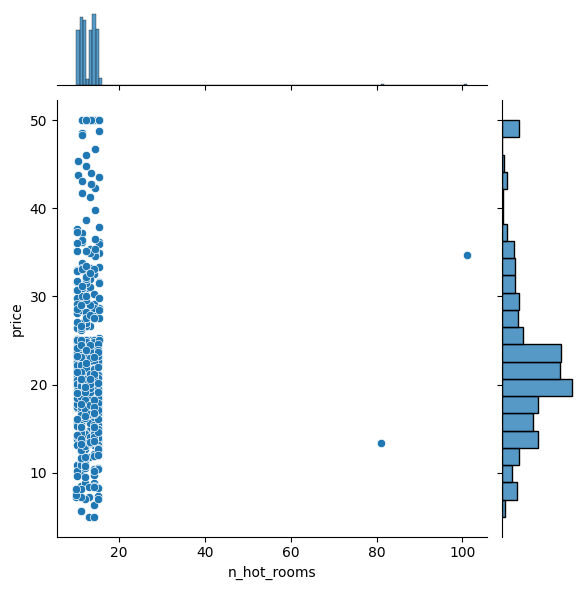

# rainfall to price 

sb.jointplot(x = "rainfall", y = "price", data=hp_d) 


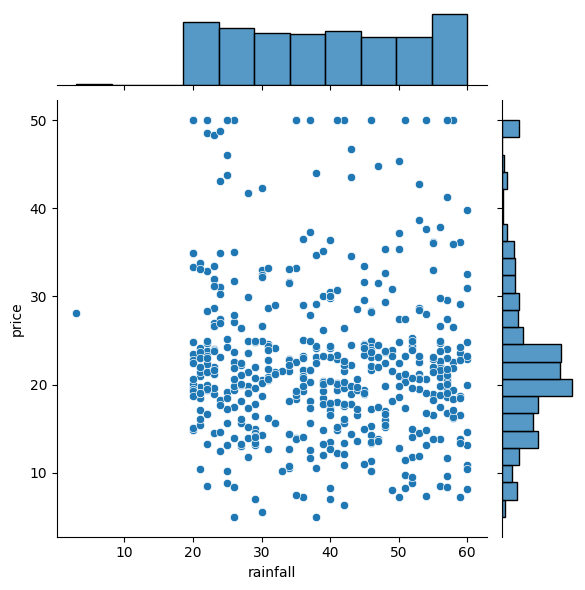

# Airport availability in each city (classification - yes/no) 

sb.countplot(x="airport", data=hp_d)


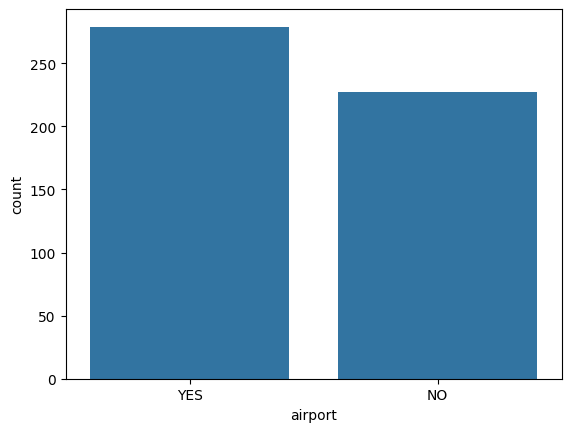

# Water body type count in each city (classification) 

sb.countplot(x="waterbody", data=hp_d) 


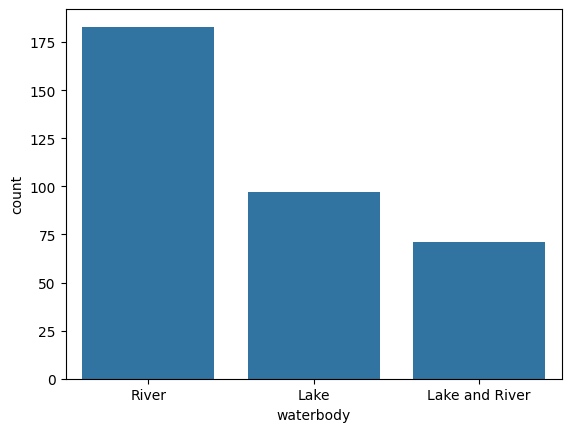

# bus terminal count 

sb.countplot(x="bus_ter", data=hp_d) 


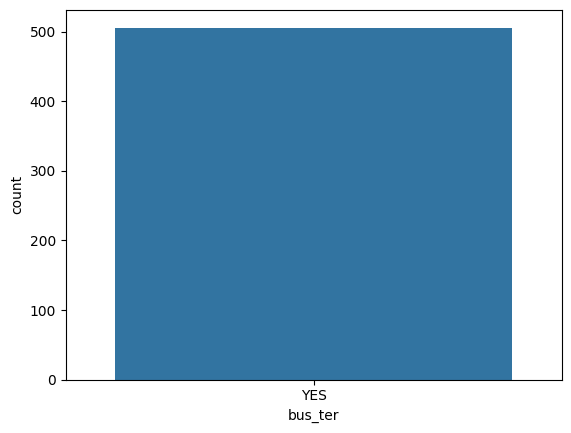

np.percentile(hp_d.n_hot_rooms, [99])      # 99th percentile 
up_pctl = np.percentile(hp_d.n_hot_rooms, [99])[0] 
up_pctl 
hp_gt_pctl = hp_d[(hp_d.n_hot_rooms > up_pctl)] 
hp_gt_pctl 
# n_hot_rooms have upper percentile value 15.39, and the outlier values to be seen here are at index 2 and 423. So we handle it with (* 3x). 

# hp_d.n_hot_rooms[(hp_d.n_hot_rooms > (3 * up_pctl))] = 3 * up_pctl 

hp_d.loc[(hp_d.n_hot_rooms > (3 * up_pctl)), 'n_hot_rooms'] = 3 * up_pctl 
hp_gt_pctl = hp_d[(hp_d.n_hot_rooms > up_pctl)] 
hp_gt_pctl 
np.percentile(hp_d.rainfall, [1])       # 1st percentile of rainfall 
lw_pctl = np.percentile(hp_d.rainfall, [1])[0] 
lw_pctl 
hp_lw_pctl = hp_d[(hp_d.rainfall < lw_pctl)] 
hp_lw_pctl 
# rainfall have lower percentile value 20 , and the outlier values to be seen here is at index 213. So we handle it with (* 0.3x). 

hp_d.loc[(hp_d.rainfall < (0.3 * lw_pctl)), 'rainfall'] = 0.3 * lw_pctl 
hp_lw_pctl = hp_d[(hp_d.rainfall < lw_pctl)] 
hp_lw_pctl 
# sb.jointplot(x=

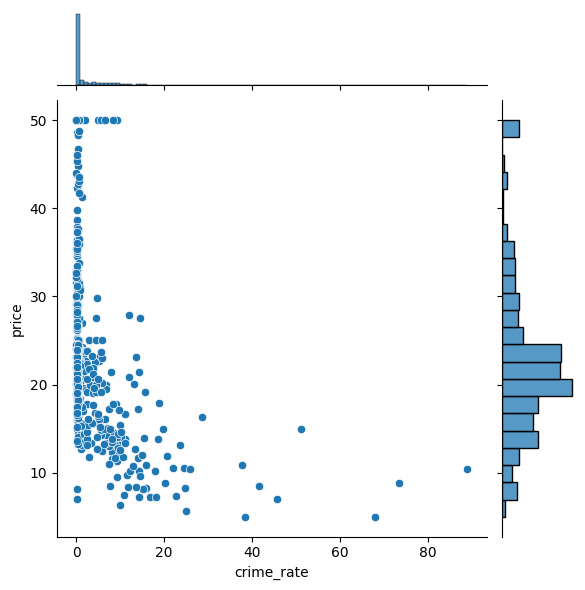

# Updated EDD, newer min for rainfall and max for hotel_room  

hp_d.describe() 
# Missing values handling 
# hp_d = hp_d.fillna(hp_d.mean()) 

hp_d.n_hos_beds = hp_d.n_hos_beds.fillna(hp_d.n_hos_beds.mean()) 
hp_d 

# hp_mean_hosbed = hp_d 
# hp_mean_hosbed 
hp_d.info()    # Updated table columns 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  ai

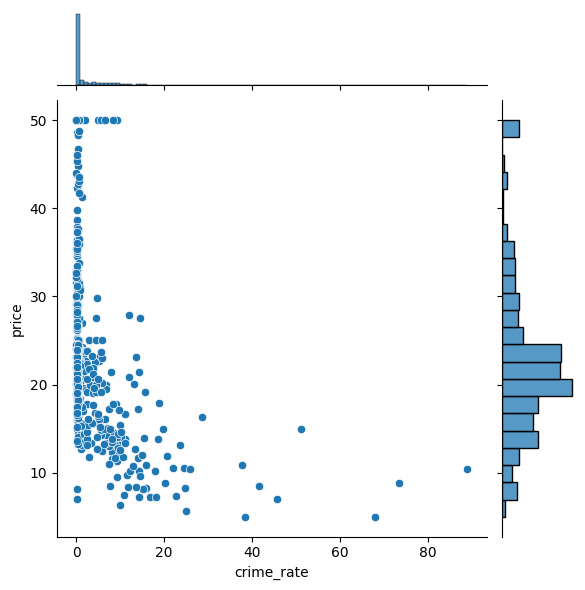

# Since the crime rate is dense near the area of 0 to 1 for X-axis, wee have to add constant to the log function, for better view and calculation along with to get a linear relationship.  

# hp_d.crime_rate = np.log(1 + hp_d.crime_rate) 
hp_d.crime_rate = np.log(3 + hp_d.crime_rate) 
hp_d 
sb.jointplot(x="crime_rate", y="price", data=hp_d)     # Updated crime_rate to work with analysis 


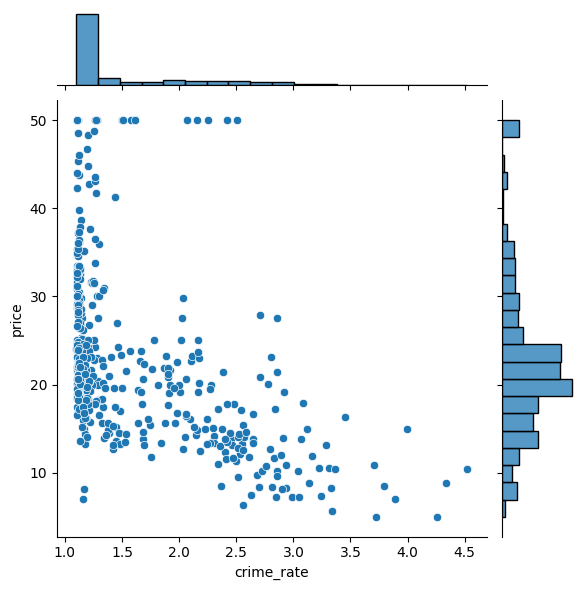

# Avg_dist is avg. dist for all given dists..

hp_d["Avg_dist"] = (hp_d.dist1 + hp_d.dist2 + hp_d.dist3 + hp_d.dist4) / 4 
hp_d 
print(hp_d.info()) 
print(hp_d.describe()) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  wat

In [2]:
# %run "../Data_Preprocessing/data_preprocess.ipynb" 

with open("../Data_Preprocessing/data_preprocess.ipynb", "r", encoding="utf-8") as f:
    notebook1 = nbformat.read(f, as_version=4)

ipython = get_ipython() 

for cell in notebook1.cells:
    if cell.cell_type == "code":
        print(cell.source) 
        if ("hp_cleaned" in cell.source or "hp_d" in cell.source):
            ipython.run_cell(cell.source, silent=True) 
            # ipython.run_cell_async(cell.source, silent=True) 

try: 
    print("\nHouse Price Cleaned Data : ")
    print(hp_cleaned.head(), sep='\n')     # type: ignore 
except NameError as e:
    print(f"Variable not found: {e}")

In [3]:
hp_cleaned        # type: ignore 

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,Avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,1.100717,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,1.107674,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,1.107668,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,1.109344,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,1.121368,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,1.119274,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.17920,27,0.056006,1,2.4775,0,0,1,0
502,20.6,1.113590,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.16480,20,0.059903,1,2.2875,1,0,1,0
503,23.9,1.118663,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.19120,31,0.057572,1,2.1675,0,0,0,0
504,22.0,1.134491,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.17600,47,0.060694,1,2.3900,1,0,0,0


In [4]:
X_multi = hp_cleaned.loc[:, hp_cleaned.columns != 'Sold']      # type: ignore 
X_multi 

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,1.100717,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,1.107674,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,1.107668,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,1.109344,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,1.121368,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,1.119274,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.17920,27,0.056006,2.4775,0,0,1,0
502,20.6,1.113590,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.16480,20,0.059903,2.2875,1,0,1,0
503,23.9,1.118663,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.19120,31,0.057572,2.1675,0,0,0,0
504,22.0,1.134491,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.17600,47,0.060694,2.3900,1,0,0,0


In [5]:
y = hp_cleaned['Sold']        # type: ignore
y 

0      0
1      1
2      0
3      0
4      0
      ..
501    1
502    1
503    1
504    1
505    1
Name: Sold, Length: 506, dtype: int64

                Logistic Regression 

In [6]:
# logst_reg = LogisticRegression()  
logst_reg = LogisticRegression(max_iter=1000)  
logst_reg.fit(X_multi, y)        # X_multi is independent variable and y is dependent  

intercept, coef = logst_reg.intercept_ , logst_reg.coef_ 
print(f"Classification Logistic Regression intercept = {intercept} \nClassification Logistic Regression coefficient = {coef}") 


Classification Logistic Regression intercept = [-2.19169745] 
Classification Logistic Regression coefficient = [[-0.26386755 -0.32176881  0.00459116 -0.99601152  1.09224412 -0.00561908
   0.26369825 -0.19843275  0.18069891 -0.07057101 -0.00483542 -0.03088972
  -0.33710487 -0.14649064 -0.06581041 -0.04122644  0.21050692]]


Train - Test Split :  

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size = 0.2, random_state = 0)    
# test_size = 0.2 ~ 20% of the dataset  
# random_state : occurance of the sets 
print(f" X_train size : {X_train.shape} \n X_test size : {X_test.shape} \n y_train size : {y_train.shape} \n y_test size : {y_test.shape}") 

 X_train size : (404, 17) 
 X_test size : (102, 17) 
 y_train size : (404,) 
 y_test size : (102,)


In [8]:
# logst_model_s = LogisticRegression()  
logst_model_s = LogisticRegression(max_iter=1000)  
logst_model_s.fit(X_train, y_train) 

y_train_prd = logst_model_s.predict(X_train) 
y_test_prd = logst_model_s.predict(X_test) 

print(f" r2_score for test set : {r2_score(y_true = y_test, y_pred = y_test_prd)} ") 
print(f" r2_score for training set : {r2_score(y_true = y_train, y_pred = y_train_prd)} ") 

print(f"Accuracy score for test set : {accuracy_score(y_true = y_test, y_pred = y_test_prd)} ") 
print(f"Accuracy score for training set : {accuracy_score(y_true = y_train, y_pred = y_train_prd)} ") 

 r2_score for test set : -0.3589341692789969 
 r2_score for training set : -0.2952550064121533 
Accuracy score for test set : 0.6666666666666666 
Accuracy score for training set : 0.6782178217821783 


In [9]:
conf_mtx_trn = confusion_matrix(y_train, y_train_prd) 
conf_mtx_trn 

array([[149,  69],
       [ 61, 125]])

In [10]:
conf_mtx_tst = confusion_matrix(y_test, y_test_prd) 
conf_mtx_tst 

array([[38, 20],
       [14, 30]])

                Linear Discriminant Analysis 

In [11]:
lda_model = LinearDiscriminantAnalysis() 
lda_model.fit(X_multi, y)  

intcp = lda_model.intercept_ 
coef = lda_model.coef_ 

print(f" Linear Discriminant Analysis model intercept = {intcp} \n Linear Discriminant Analysis model coefficient = {coef} ") 

 Linear Discriminant Analysis model intercept = [-1.0100335] 
 Linear Discriminant Analysis model coefficient = [[-2.15859090e-01  6.34510302e-03  2.43948581e-02 -7.66395107e+00
   7.35384217e-01 -1.27730317e-03  2.70730880e-01 -1.78854819e-01
   1.79549201e-01 -6.38953380e-02 -3.75714852e-03  3.42852956e+01
  -3.84914432e-01 -1.68026800e-01 -2.02838437e-01 -1.51809767e-01
   2.00326444e-01]] 


Train - Test Split : 

In [12]:
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_multi, y, test_size=0.2, random_state=0)   
print(f"LDA :\n X_train size : {X_train.shape} \n X_test size : {X_test.shape} \n y_train size : {y_train.shape} \n y_test size : {y_test.shape}") 

LDA :
 X_train size : (404, 17) 
 X_test size : (102, 17) 
 y_train size : (404,) 
 y_test size : (102,)


In [13]:
lda_model_s = LinearDiscriminantAnalysis() 
lda_model_s.fit(X_train_lda, y_train_lda) 

y_train_lda_prd = lda_model_s.predict(X_train_lda) 
y_test_lda_prd = lda_model_s.predict(X_test_lda) 

print("LDA -- ") 
print(f" r2_score of training set : {r2_score(y_true=  y_train_lda, y_pred = y_train_lda_prd)} ") 
print(f" r2_score of test set : {r2_score(y_true = y_test_lda, y_pred = y_test_lda_prd)} ") 

print(f"Accuracy score for training set : {accuracy_score(y_true = y_train_lda, y_pred = y_train_lda_prd)} ")
print(f"Accuracy score for test set : {accuracy_score(y_true = y_test_lda, y_pred = y_test_lda_prd)} ") 

LDA -- 
 r2_score of training set : -0.2653645062641805 
 r2_score of test set : -0.39890282131661436 
Accuracy score for training set : 0.6856435643564357 
Accuracy score for test set : 0.6568627450980392 


In [14]:
conf_mtx_lda_trn = confusion_matrix(y_train_lda, y_train_lda_prd) 
conf_mtx_lda_trn 

array([[158,  60],
       [ 67, 119]])

In [15]:
conf_mtx_lda_tst = confusion_matrix(y_test_lda, y_test_lda_prd) 
conf_mtx_lda_tst 

array([[34, 24],
       [11, 33]])